# P1 : Test a perpetual phenomenon

## Project Overview

In this project, you will investigate a classic phenomenon from experimental psychology called the ***Stroop Effect***. You will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, you will interpret your results in terms of your hypotheses.

## Statistics: The Science of Decisions Project Instructions

### Background Information

In a **Stroop** task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. 

In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. 

In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. 

In each case, we **measure the time it takes** to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

#### Sample Data

<pre>
----------       ----------- 
Congruent    |   Incongruent  
----------       -----------  
12.079	   |   19.278
16.791	   |   18.741
 9.564	   |   21.214
  8.63	   |   15.687
14.669	   |   22.803
12.238	   |   20.878
14.692	   |   24.572
 8.987	   |   17.394
 9.401	   |   20.762
 14.48	   |   26.282
22.328       |   24.524
15.298	   |   18.644
15.073	   |    17.51
16.929	   |    20.33
  18.2	   |   35.255
 12.13	   |   22.158
18.495	   |   25.139
10.639	   |   20.429
11.344	   |   17.425
12.369	   |   34.288
12.944	   |   23.894
14.233	   |    17.96
 19.71	   |   22.058
16.004	   |   21.157

</pre>

#### Approach

The data provided above are two samples taken on same set of subjects/persons, and each row represents a person and the result for both the congruent & inconguent cases. As the persons(subjects) are involved in the the tests are same the samples are dependent samples and with subject design.

We will run a ***dependent sample t-test*** to answer if the incongruent case is significantly difficult than congruent case.

#### Question 1 : What is our independent variable? What is our dependent variable?

- The independent variable is the type of condition (congruent or incongruent).
- The dependent variable is the time taken(in seconds) to complete the tests.

#### Question 2 : What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?

### Hypotheses

##### Null hypothesis
The null hypothesis, denoted by H0, is that the incongruent case is not much difficult as compared to the congruent case. The mean for incongruent case is almost same as the congruent case. 

##### Alternative hypothesis
The alternative hypothesis, denoted by H1, is that the incongruent case is very much difficult as compared to the congruent case. The mean for incongruent case is much greater than that of the congruent case.


##### Mathematically

- H0 : 
       Congruent Mean = Incongruent Mean      
       Incongruent Mean - Congruent Mean = 0      
- H1 : 
       Congruent Mean < Incongruent Mean      
       Incongruent Mean - Congruent Mean > 0 

- Alpha Level = 0.05

As the samples are having size lesser than 30 and not following normal distribution we will not go for Z-Test. Instead we will go for one tail t-tests.

We are interested in if the incongruent case is more difficult than the congruent one; and we measure this as the time taken to complete the test. So it's obvious that difficult case will take more time than the easier one. We will check in only one direction.

### Starting the test

In [2]:
# Import Libraries
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
figsize(15, 5)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Congruent Data
c_data = pd.Series([12.079, 16.791, 9.564, 8.63, 14.669, 12.238, 14.692, 8.987, 9.401, 
                    14.48, 22.328, 15.298, 15.073, 16.929, 18.2, 12.13, 18.495, 10.639, 
                    11.344, 12.369, 12.944, 14.233, 19.71, 16.004])

# Incongruent Data
ic_data = pd.Series([19.278, 18.741, 21.214, 15.687, 22.803, 20.878, 24.572, 17.394, 
                     20.762, 26.282, 24.524, 18.644, 17.51, 20.33, 35.255, 22.158, 
                     25.139, 20.429, 17.425, 34.288, 23.894, 17.96, 22.058, 21.157])

dataframe = pd.concat([c_data, ic_data], axis = 1)
dataframe.columns = ['Congruent', 'Incongruent']
dataframe.index = [range(1,len(dataframe) + 1)]

#### Question 3 : Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Data
----------

In [4]:
# Print Data Records
dataframe

,Congruent,Incongruent
1,12.079,19.278
2,16.791,18.741
3,9.564,21.214
4,8.630,15.687
5,14.669,22.803
6,12.238,20.878
7,14.692,24.572
8,8.987,17.394
9,9.401,20.762
10,14.480,26.282


## Descriptive Statistics

In [5]:
# Descriptive Statistics
MEAN = dataframe.mean()
MEDIAN = dataframe.median()
SD = dataframe.std()
VAR = dataframe.var()
IQR = dataframe.quantile(0.75) - dataframe.quantile(0.25)
SKEW = dataframe.skew()          # Positively Skewed, Incongruent is more positively Skewed
KURT = dataframe.kurtosis()      # Congruent has negative kurtosis, more flat & less height

desc_data = pd.DataFrame([MEAN, MEDIAN, SD, VAR, IQR, SKEW, KURT]).round(4)
desc_data.index = ["MEAN", "MEDIAN", "SD", "VAR", "IQR", "SKEW", "KURT"]
desc_data

,Congruent,Incongruent
MEAN,14.0511,22.0159
MEDIAN,14.3565,21.0175
SD,3.5594,4.7971
VAR,12.6690,23.0118
IQR,4.3055,5.3348
SKEW,0.4169,1.5476
KURT,-0.2052,2.6889


In [6]:
# Another way to get the data descriptions
dataframe.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).round(4)

,Congruent,Incongruent
count,24.0000,24.0000
mean,14.0511,22.0159
std,3.5594,4.7971
min,8.6300,15.6870
10%,9.4499,17.4505
25%,11.8953,18.7167
50%,14.3565,21.0175
75%,16.2008,24.0515
90%,18.4065,25.9391
max,22.3280,35.2550


#### Question 4 : Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

## Visualizations

### Line Plot - Congruent vs Incongruent

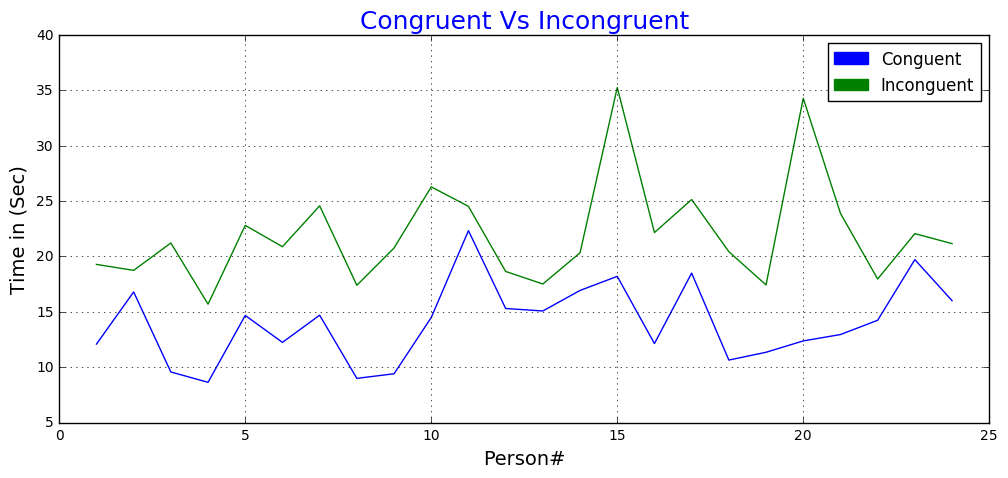

In [7]:
# Line Plot
figsize(12, 5)
plt.plot(dataframe)
plt.ylabel("Time in (Sec)", fontsize = 14)
plt.xlabel("Person#", fontsize = 14)
plt.title("Congruent Vs Incongruent",color = 'BLUE', fontsize = 18)
plt.grid(True)
blue_patch = mpatches.Patch(color='BLUE', label='Conguent')
green_patch = mpatches.Patch(color='Green', label='Inconguent')
plt.legend(handles = [blue_patch, green_patch])
plt.show()

### Histogram - Congruent

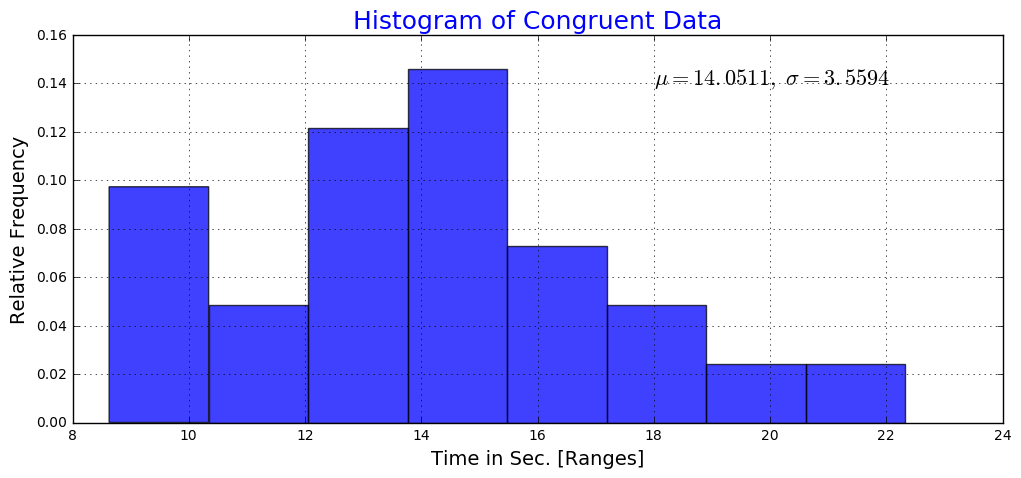

In [8]:
# Histogram Plot of Congruent
plt.hist(dataframe["Congruent"], bins = 8, normed = True, facecolor='b', alpha=0.75)
plt.xlabel("Time in Sec. [Ranges]", fontsize = 14)
plt.ylabel("Relative Frequency", fontsize = 14)
plt.title("Histogram of Congruent Data", fontsize = 18, color = "BLUE")
plt.grid(True)
plt.text(18, 0.14, 
         r"$\mu = "+ str(desc_data["Congruent"]["MEAN"]) + ",\ \sigma = " +str(desc_data["Congruent"]["SD"])+ "$",
         fontsize = 16
        )
plt.show()

### Histogram - Incongruent

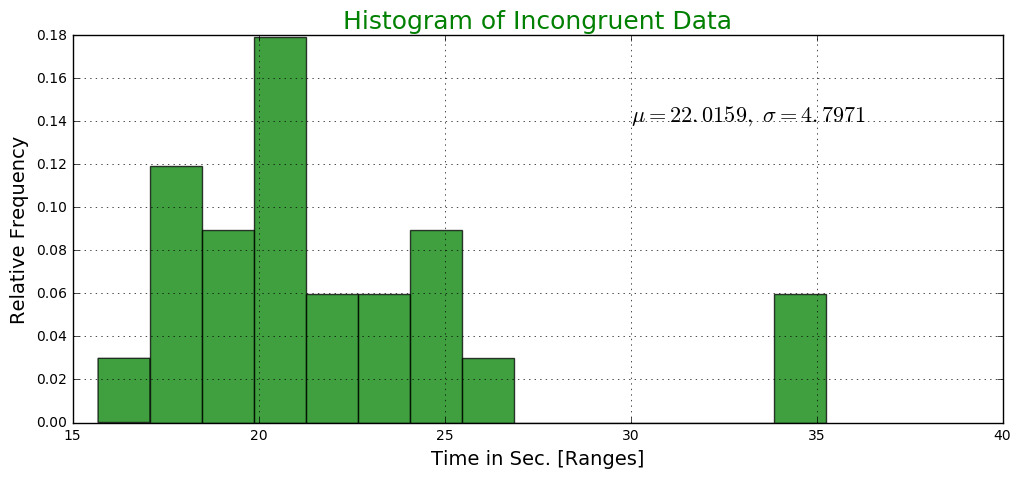

In [9]:
# Histogram Plot of Incongruent
plt.hist(dataframe["Incongruent"], bins = 14, normed = True, facecolor='g', alpha=0.75)
plt.xlabel("Time in Sec. [Ranges]", fontsize = 14)
plt.ylabel("Relative Frequency", fontsize = 14)
plt.title("Histogram of Incongruent Data", fontsize = 18, color = "GREEN")
plt.grid(True)
plt.text(30, 0.14, 
         r"$\mu = "+ str(desc_data["Incongruent"]["MEAN"]) + ",\ \sigma = " +str(desc_data["Incongruent"]["SD"])+ "$",
         fontsize = 16
        )
plt.show()
# More height and postively Skewed
# Looks like an outlier there in the data set

### Boxplots - Congruent vs Incongruent

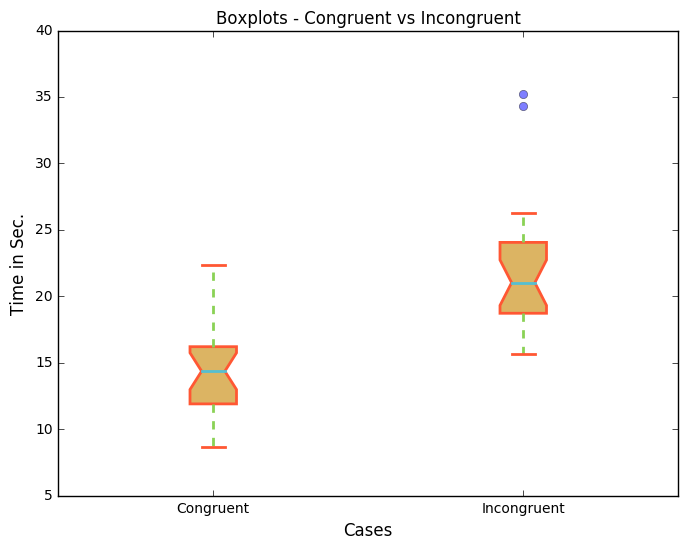

In [10]:
# Box plots
boxes = []
for x in dataframe:
    boxes.append(list(dataframe[x]))
    
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(boxes, notch=True, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#FF5733', linewidth=2)
    # change fill color
    box.set( facecolor = '#DCB463' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#8AD255', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#FF5733', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#55BFD2', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#C755D2', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['Congruent', 'Incongruent'])
plt.title("Boxplots - Congruent vs Incongruent")
plt.xlabel("Cases", fontsize = 12)
plt.ylabel("Time in Sec.", fontsize = 12)
plt.show()

#### Question 5 :: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We will perform dependent sample t-tests and for that we need to find out the differences between sample values. We will subtract congruent data from incongruent data and will work on the differences.

As per the hypothese we need to find if difference is expected to be zero (Null Hypothese) or is expected to be a difference towards incongruent.

In [11]:
# Sample Data Differences
difference_data = dataframe['Incongruent'] - dataframe['Congruent']
difference_data

1      7.199
2      1.950
3     11.650
4      7.057
5      8.134
6      8.640
7      9.880
8      8.407
9     11.361
10    11.802
11     2.196
12     3.346
13     2.437
14     3.401
15    17.055
16    10.028
17     6.644
18     9.790
19     6.081
20    21.919
21    10.950
22     3.727
23     2.348
24     5.153
dtype: float64

#### Time to find some sample statistic

In [12]:
# Find Sample Difference statistic
mean_D = round(difference_data.mean(), 4)
median_D = round(difference_data.median(), 4)
sd_D = round(difference_data.std(), 4)

print 'Descriptive Statistics'
print '-' * 40
print "Mean of Differences   :: ", mean_D
print "Median of Differences :: ", median_D
print "SD of diffences       :: ", sd_D

Descriptive Statistics
----------------------------------------
Mean of Differences   ::  7.9648
Median of Differences ::  7.6665
SD of diffences       ::  4.8648


In [13]:
# Another way of displaying statistics
difference_data.describe().round(4)

count    24.0000
mean      7.9648
std       4.8648
min       1.9500
25%       3.6455
50%       7.6665
75%      10.2585
max      21.9190
dtype: float64

#### Plot the data points

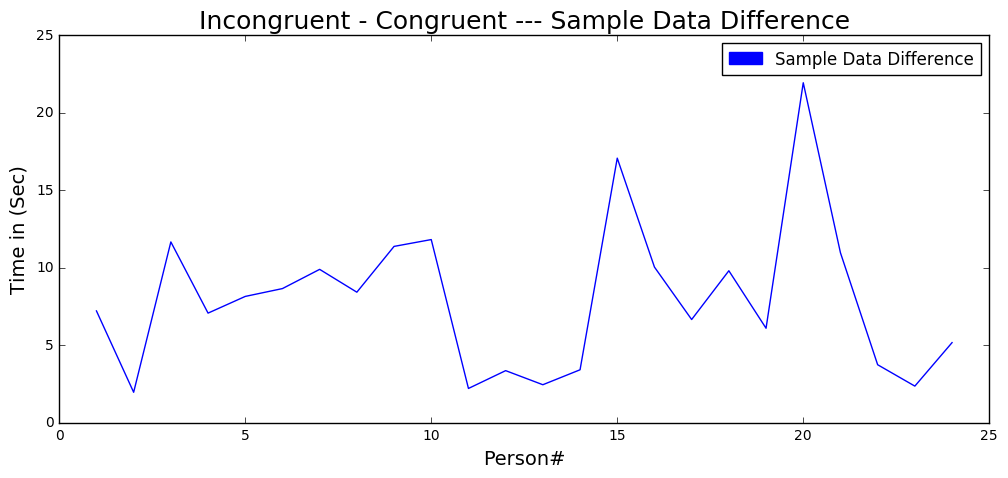

In [14]:
# Line Plot
plt.plot(difference_data)
plt.ylabel("Time in (Sec)", fontsize = 14)
plt.xlabel("Person#", fontsize = 14)
plt.title("Incongruent - Congruent --- Sample Data Difference", fontsize = 18)
color_patch = mpatches.Patch(color='BLUE', label='Sample Data Difference')
plt.legend(handles = [color_patch])
plt.show()

#### Plot the Histogram

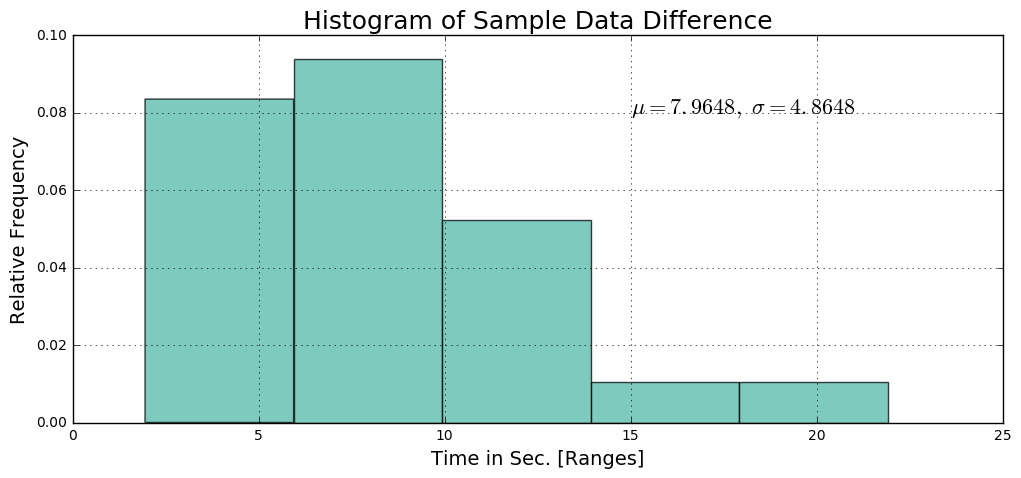

In [15]:
# Histogram Plot of Congruent
plt.hist(difference_data, bins = 5, normed = True, facecolor='#53B9A9', alpha=0.75)
plt.xlabel("Time in Sec. [Ranges]", fontsize = 14)
plt.ylabel("Relative Frequency", fontsize = 14)
plt.title("Histogram of Sample Data Difference", fontsize = 18)
plt.grid(True)
plt.text(15, 0.08, 
         r"$\mu = "+ str(mean_D) + ",\ \sigma = " +str(sd_D)+ "$",
         fontsize = 16
        )
plt.show()

#### Draw a BOX plot

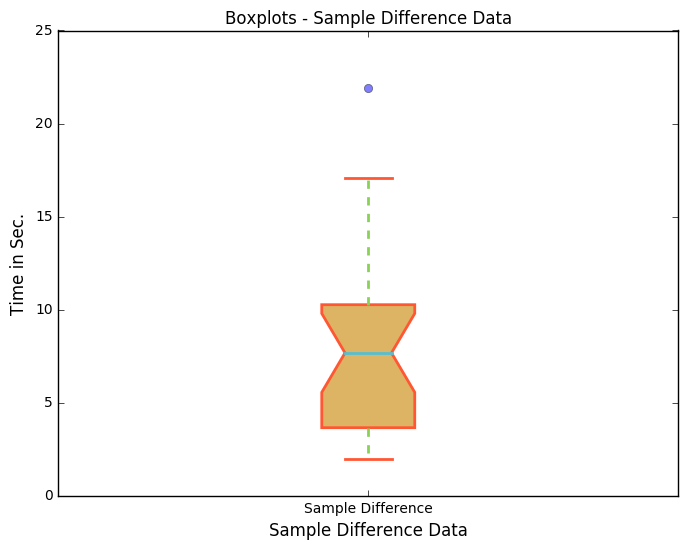

In [16]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(list(difference_data), notch=True, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#FF5733', linewidth=2)
    # change fill color
    box.set( facecolor = '#DCB463' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#8AD255', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#FF5733', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#55BFD2', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#C755D2', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['Sample Difference'])
plt.title("Boxplots - Sample Difference Data")
plt.xlabel("Sample Difference Data", fontsize = 12)
plt.ylabel("Time in Sec.", fontsize = 12)
plt.show()

#### Find T-Critical Values

In [17]:
# T-Critical value for Alpha level 0.05
t_critical_95 = round(stats.t.ppf(1 - 0.05, 23), 4)

# T-Critical value for Alpha level 0.01
t_critical_99 = round(stats.t.ppf(1 - 0.01, 23), 4)

# T-Critical value for Alpha level 0.005
t_critical_995 = round(stats.t.ppf(1 - 0.005, 23), 4)

# T-Critical value for Alpha level 0.001
t_critical_999 = round(stats.t.ppf(1 - 0.001, 23), 4)

print '95% T-Critical     :: ', t_critical_95
print '99% T-Critical     :: ', t_critical_99
print '99.5% T-Critical   :: ', t_critical_995
print '99.9% T-Critical   :: ', t_critical_999

95% T-Critical     ::  1.7139
99% T-Critical     ::  2.4999
99.5% T-Critical   ::  2.8073
99.9% T-Critical   ::  3.485


#### Find T-Statistic

In [18]:
# T-Statistic
SEM = round(sd_D / sqrt(len(difference_data)), 4)
print 'Standard error of mean differences :: ', SEM
t_statistic = round(mean_D / SEM , 4)
print 'T-Statistic    :: ', t_statistic

Standard error of mean differences ::  0.993
T-Statistic    ::  8.0209


#### Find Margin of Error

In [19]:
# Margin of Error
margin_of_error = round(t_critical_95 * SEM, 4)
margin_of_error

1.7019

#### Find 95% confidence interval

In [20]:
# 95% confidence interval
CI_lower = mean_D - margin_of_error
CI_upper = mean_D + margin_of_error
print '95% Confidence interval   :: ', zip([CI_lower], [CI_upper])

95% Confidence interval   ::  [(6.2629, 9.6667)]


#### Conclusions

We will reject the NULL as the T-Statistic value is far above all the T-Critical values(for Alpha levels 0.05, 0.01, 0.005, 0.001); so p-value is much lesser than 0.05(Alpha level).

The result has a statistical significance as the p-value is much lesser and we can reject the NULL. The result is meaningful as the incongruent case was much difficult than congruent one; and the statistics also shows this.

#### Question 6 :: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

In [21]:
# R-Square & Cohen's D
cohens_D = mean_D / sd_D
print 'Cohens D :: ', cohens_D

df = len(difference_data) - 1
R2 = (t_statistic ** 2) / (t_statistic ** 2 + df)
print 'R Square :: ', R2

Cohens D ::  1.63723071863
R Square ::  0.736645755118


- Most of the difference around 74% is due to inconguent case diffculties. This was expected as the incongruent case is very difficult as compared to the congruent case. 


- There can be two tasks that can be harder or similar to the stroop test.

    1. Reverse the color name for the incongreunt case.
    2. Instead of writing color names we can write object names like person's name, city names etc. in the incongruent case.

## Testing -- Remove the outlier and try

In [22]:
# Remove the outlier
sorted_diff_data = difference_data.sort_values()[:-1]
s_mean_D = round(sorted_diff_data.mean(), 4)
s_median_D = round(sorted_diff_data.median(), 4)
s_sd_D = round(sorted_diff_data.std(), 4)

print "Mean of Differences   :: ", s_mean_D
print "Median of Differences :: ", s_median_D
print "SD of diffences       :: ", s_sd_D

# T-Statistic
SEM = round(s_sd_D / sqrt(len(sorted_diff_data)), 4)
print 'Standard error of mean differences :: ', SEM
t_statistic = round(s_mean_D / SEM , 4)
print 'T-Statistic    :: ', t_statistic

Mean of Differences   ::  7.3581
Median of Differences ::  7.199
SD of diffences       ::  3.9378
Standard error of mean differences ::  0.8211
T-Statistic    ::  8.9613


## References

- https://statistics.laerd.com
- https://en.wikipedia.org/wiki/Stroop_effect
- http://matplotlib.org/api/pyplot_summary.html